# Case Study of US Steel importation

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('SIMA Monthly Long_3.xlsx', header=2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19395 entries, 0 to 19394
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Country             19395 non-null  object        
 1   6 Steel Categories  19395 non-null  object        
 2   Category            19395 non-null  object        
 3   Source Name         19395 non-null  object        
 4   Date                19395 non-null  datetime64[ns]
 5   Value               19395 non-null  float64       
 6   Volume              19395 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.0+ MB


In [4]:
df.head()

,Country,6 Steel Categories,Category,Source Name,Date,Value,Volume
0,Mexico,Semi-Finished (Carbon and Alloy),Carbon and Alloy Slab,License Data,2021-12-01,3.013421e+07,34095.865
1,Russia,Semi-Finished (Carbon and Alloy),Carbon and Alloy Slab,License Data,2021-12-01,4.286832e+07,56560.980
2,Brazil,Semi-Finished (Carbon and Alloy),Carbon and Alloy Slab,License Data,2021-11-01,3.681985e+07,39082.705
3,Mexico,Semi-Finished (Carbon and Alloy),Carbon and Alloy Slab,License Data,2021-11-01,5.220244e+07,67755.841
4,Russia,Semi-Finished (Carbon and Alloy),Carbon and Alloy Slab,License Data,2021-11-01,1.540783e+08,112904.352


## 6 Steel Categories

In [5]:
steel = df.groupby(['6 Steel Categories', 'Date']).sum()

In [6]:
steel['price'] = steel.Value/steel.Volume

In [7]:
df.groupby(['6 Steel Categories']).sum().sort_values('Volume', ascending=False)

,Value,Volume
6 Steel Categories,,
Flat (Carbon and Alloy),1.920306e+10,1.873457e+07
Semi-Finished (Carbon and Alloy),7.783828e+09,1.232867e+07
Long (Carbon and Alloy),7.497527e+09,8.146434e+06
Pipe and Tube (Carbon and Alloy),8.219759e+09,6.761282e+06
Stainless,5.675890e+09,1.812771e+06
Other (Carbon and Alloy),7.333270e+07,6.626934e+04


In [8]:
lst = ['Flat (Carbon and Alloy)','Semi-Finished (Carbon and Alloy)', 'Long (Carbon and Alloy)','Pipe and Tube (Carbon and Alloy)','Stainless','Other (Carbon and Alloy)']

Text(0.5, 1.0, 'US Steel Import Trends of Volume by Steel Categories')

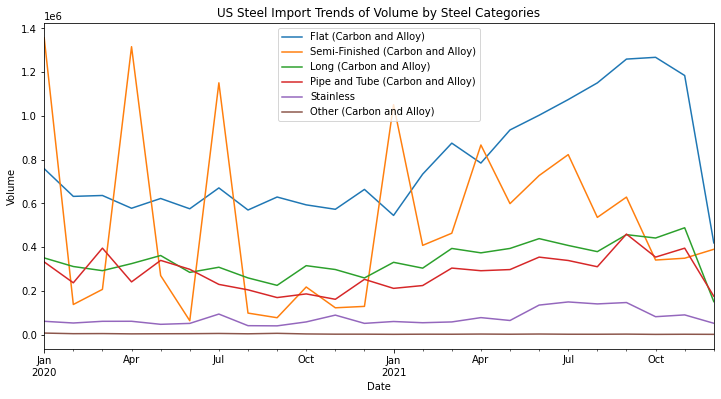

In [9]:
plt.figure(figsize=(12,6))
for c in lst: 
    steel.loc[c].Volume.plot(label=c)
plt.legend()
plt.ylabel('Volume')
plt.title('US Steel Import Trends of Volume by Steel Categories')

Text(0.5, 1.0, 'US Steel Import Trends of Avg Price by Steel Categories')

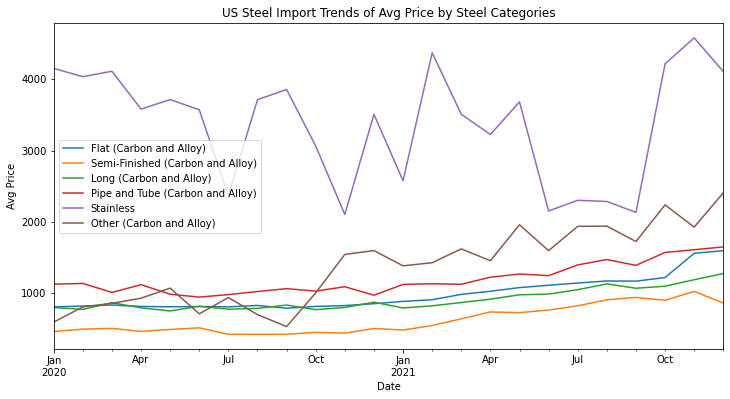

In [10]:
plt.figure(figsize=(12,6))
for c in lst: 
    steel.loc[c].price.plot(label=c)
plt.legend()
plt.ylabel('Avg Price')
plt.title('US Steel Import Trends of Avg Price by Steel Categories')

## Product Category

In [11]:
df.groupby(['Category']).sum().sort_values('Volume', ascending=False).head(10)

,Value,Volume
Category,,
Carbon and Alloy Slab,5.309647e+09,8.546430e+06
Carbon and Alloy Hot Rolled Sheets,3.738412e+09,4.525104e+06
Carbon and Alloy Galv. Hot Dipped Sheets and Strip,5.022805e+09,4.476210e+06
Carbon and Alloy Other Semifinished (not slab),2.457666e+09,3.776093e+06
Carbon and Alloy Oil Country Goods,2.784410e+09,2.511407e+06
Carbon and Alloy Cold Rolled Sheets,2.382920e+09,2.342725e+06
Carbon and Alloy Reinforcing Bars,1.244363e+09,2.123844e+06
Carbon and Alloy Plates in Coils,1.864977e+09,2.055161e+06
Carbon and Alloy Other Metallic Coat,2.090819e+09,1.629870e+06


<AxesSubplot:ylabel='Volume'>

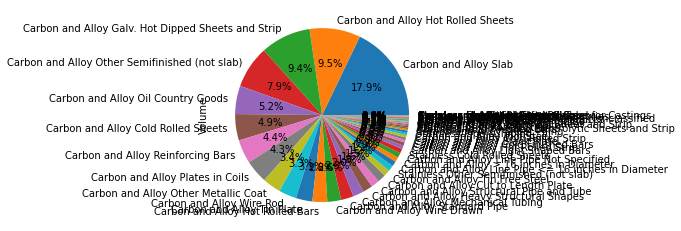

In [12]:
df.groupby(['Category']).sum().sort_values('Volume', ascending=False).Volume.plot.pie(autopct='%1.1f%%')

In [13]:
category = df.groupby(['Category', 'Date']).sum()

In [14]:
lst = ['Carbon and Alloy Slab','Carbon and Alloy Hot Rolled Sheets','Carbon and Alloy Galv. Hot Dipped Sheets and Strip','Carbon and Alloy Other Semifinished (not slab)','Carbon and Alloy Oil Country Goods']

Text(0.5, 1.0, 'US Steel Import Trends of Volume by Major Categories (Top 5)')

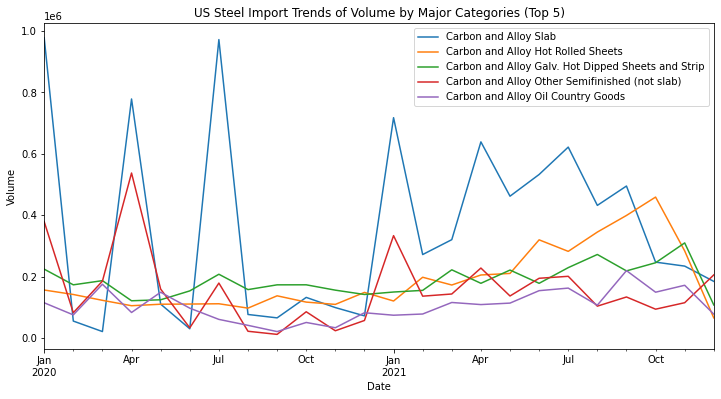

In [15]:
plt.figure(figsize=(12,6))
for c in lst:
    category.loc[c].Volume.plot(label=c)
plt.legend()
plt.ylabel('Volume')
plt.title('US Steel Import Trends of Volume by Major Categories (Top 5)')

In [18]:
category['price'] = category.Value/category.Volume

Text(0.5, 1.0, 'US Steel Import Trends of Avg Price by Major Categories (Top 5)')

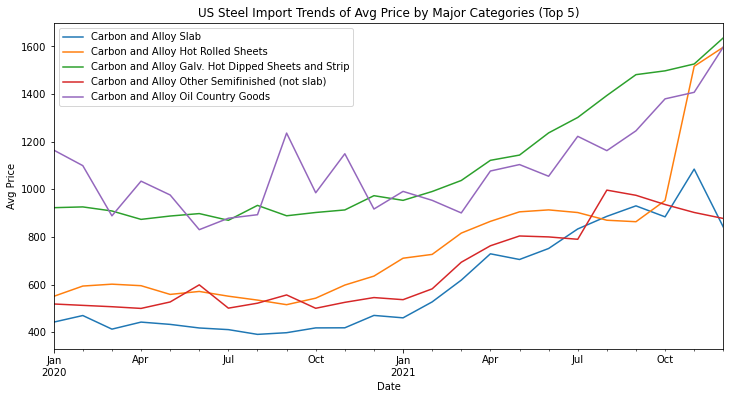

In [19]:
plt.figure(figsize=(12,6))
for c in lst:
    category.loc[c].price.plot(label=c)
plt.legend()
plt.ylabel('Avg Price')
plt.title('US Steel Import Trends of Avg Price by Major Categories (Top 5)')

## Country

In [136]:
country = df.groupby(['Country', 'Date']).sum()

## Country

In [20]:
country = df.groupby(['Country', 'Date']).sum()
country['price'] = country.Value/country.Volume

In [21]:
df.groupby(['Country']).sum().sort_values('Volume', ascending=False).head(10)

,Value,Volume
Country,,
Canada,1.164816e+10,1.131245e+07
Brazil,4.926980e+09,7.528348e+06
Mexico,6.799561e+09,7.116326e+06
Korea,4.191619e+09,4.223984e+06
Germany,2.529687e+09,1.913680e+06
Russia,1.260053e+09,1.728113e+06
Japan,2.274096e+09,1.676113e+06
Turkey,1.010194e+09,1.410418e+06
Taiwan,1.934083e+09,1.296650e+06


<AxesSubplot:ylabel='Volume'>

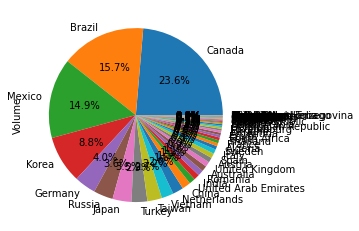

In [22]:
df.groupby(['Country']).sum().sort_values('Volume', ascending=False).Volume.plot.pie(autopct='%1.1f%%')

In [23]:
lst = ['Canada','Brazil','Mexico','Korea','Germany']

Text(0.5, 1.0, 'US Steel Import Trends of Volume by Major Countries (Top 5)')

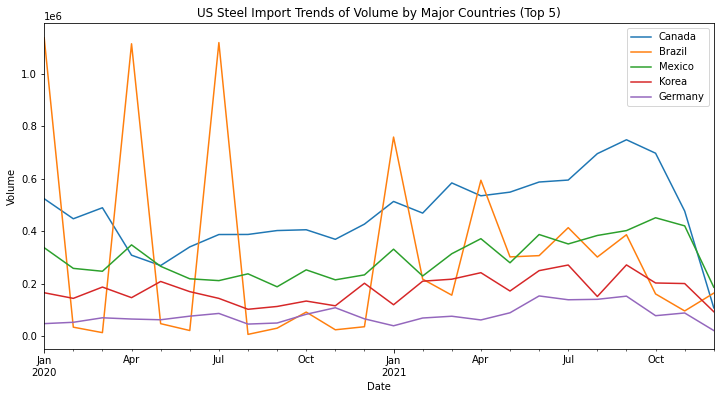

In [24]:
plt.figure(figsize=(12,6))
for c in lst:
    country.loc[c].Volume.plot(label=c)
plt.legend()
plt.ylabel('Volume')
plt.title('US Steel Import Trends of Volume by Major Countries (Top 5)')

Text(0.5, 1.0, 'US Steel Import Trends of Avg Price by Major Countries (Top 5)')

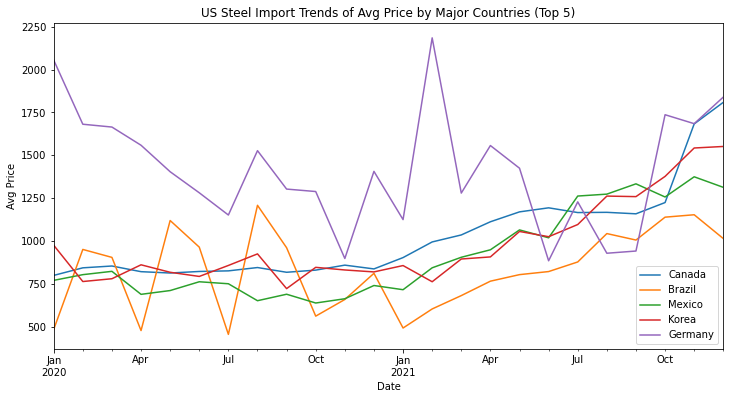

In [25]:
plt.figure(figsize=(12,6))
for c in lst:
    country.loc[c].price.plot(label=c)
plt.legend()
plt.ylabel('Avg Price')
plt.title('US Steel Import Trends of Avg Price by Major Countries (Top 5)')

## Forecast by Country

### ARIMA Model

In [26]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [27]:
top10 = ['Canada','Brazil','Mexico','Korea','Germany','Russia','Japan','Turkey','Taiwan','Vietnam']

In [28]:
volume = country.drop(['Value', 'price'], axis=1)

In [29]:
country_forecast = {}
for c in top10:
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(volume.loc[c], 
                                            order=(1, 0, 1), 
                                            seasonal_order=(0, 0, 1, 12), 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)                     
    # Fit the model and forecast
    output = ARIMA_MODEL.fit()
    forecast = output.forecast(steps=3)
    country_forecast[c] = volume.loc[c].Volume.append(forecast)

In [30]:
country_forecast = pd.DataFrame(country_forecast)

Text(0.5, 1.0, 'Forecast of US Steel Import Trends of Volume by Countries')

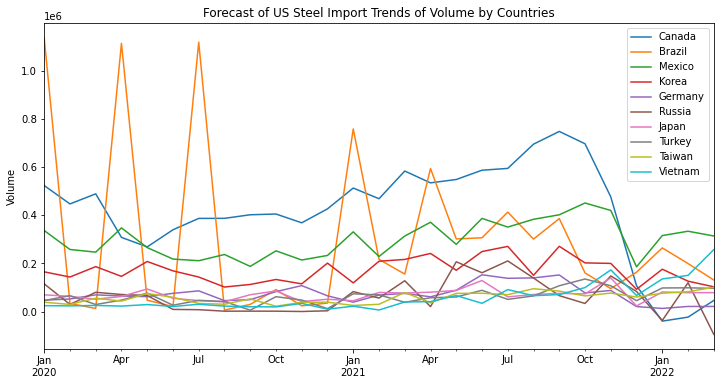

In [31]:
plt.figure(figsize=(12,6))
for c in top10:
    country_forecast[c].plot(label=c)
plt.legend()
plt.ylabel('Volume')
plt.title('Forecast of US Steel Import Trends of Volume by Countries')

### FB Prophet

In [45]:
from fbprophet import Prophet

#### Canada

In [33]:
fb = pd.DataFrame()
fb['y'] = volume.loc['Canada']
fb.reset_index(inplace=True)
fb.rename(columns={'Date': 'ds'}, inplace=True)

In [34]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)
model.fit(fb)

future_dates = model.make_future_dataframe(periods=3, freq='M')
forecast2022 = model.predict(future_dates)
forecast2022.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,338615.864404,461966.715522,647273.496401,338615.864404,338615.864404,217979.517002,217979.517002,217979.517002,217979.517002,217979.517002,217979.517002,0.0,0.0,0.0,556595.381406
1,2020-02-01,356524.745584,382343.824864,572583.384550,356524.745584,356524.745584,122351.621258,122351.621258,122351.621258,122351.621258,122351.621258,122351.621258,0.0,0.0,0.0,478876.366842
2,2020-03-01,373278.215013,329696.720741,527386.936285,373278.215013,373278.215013,55477.936203,55477.936203,55477.936203,55477.936203,55477.936203,55477.936203,0.0,0.0,0.0,428756.151215
3,2020-04-01,391187.096102,201564.837606,388283.788836,391187.096102,391187.096102,-93625.830109,-93625.830109,-93625.830109,-93625.830109,-93625.830109,-93625.830109,0.0,0.0,0.0,297561.265993
4,2020-05-01,408518.271409,203357.094505,387789.680715,408518.271409,408518.271409,-111515.844562,-111515.844562,-111515.844562,-111515.844562,-111515.844562,-111515.844562,0.0,0.0,0.0,297002.426847


Text(0.5, 1.0, 'Forecast of US Steel Import Trends of Volume by Canada')

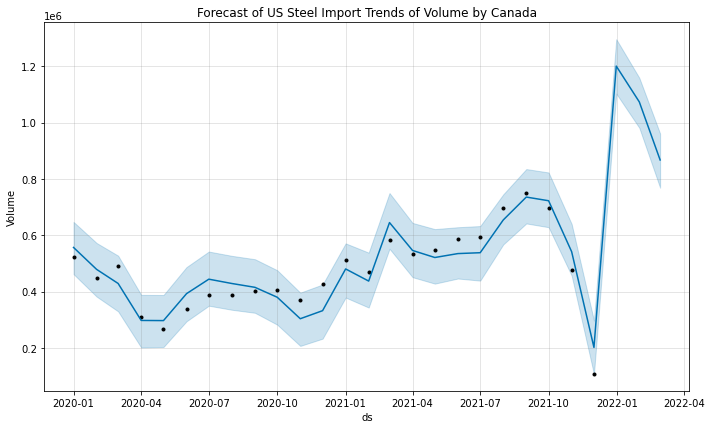

In [35]:
model.plot(forecast2022, uncertainty=True);
plt.ylabel('Volume')
plt.title('Forecast of US Steel Import Trends of Volume by Canada')

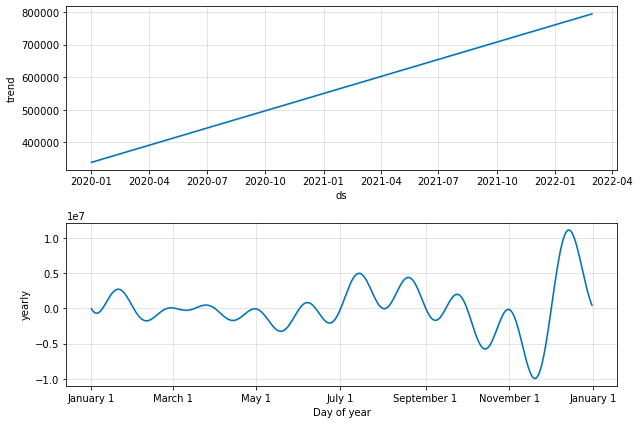

In [36]:
model.plot_components(forecast2022);

#### Mexico

In [37]:
fb = pd.DataFrame()
fb['y'] = volume.loc['Mexico']
fb.reset_index(inplace=True)
fb.rename(columns={'Date': 'ds'}, inplace=True)

In [38]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)
model.fit(fb)

future_dates = model.make_future_dataframe(periods=3, freq='M')
forecast2022 = model.predict(future_dates)
forecast2022.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,219591.837555,302565.082478,387585.741701,219591.837555,219591.837555,123633.585813,123633.585813,123633.585813,123633.585813,123633.585813,123633.585813,0.0,0.0,0.0,343225.423368
1,2020-02-01,230488.350118,226216.148514,312566.405342,230488.350118,230488.350118,39801.275029,39801.275029,39801.275029,39801.275029,39801.275029,39801.275029,0.0,0.0,0.0,270289.625147
2,2020-03-01,240681.861883,157012.147336,248463.223577,240681.861883,240681.861883,-36928.653530,-36928.653530,-36928.653530,-36928.653530,-36928.653530,-36928.653530,0.0,0.0,0.0,203753.208353
3,2020-04-01,251578.374427,266232.587559,355728.273014,251578.374427,251578.374427,59918.627934,59918.627934,59918.627934,59918.627934,59918.627934,59918.627934,0.0,0.0,0.0,311497.002361
4,2020-05-01,262123.386546,198128.033110,290175.010585,262123.386546,262123.386546,-19803.724454,-19803.724454,-19803.724454,-19803.724454,-19803.724454,-19803.724454,0.0,0.0,0.0,242319.662092


Text(0.5, 1.0, 'Forecast of US Steel Import Trends of Volume by Mexico')

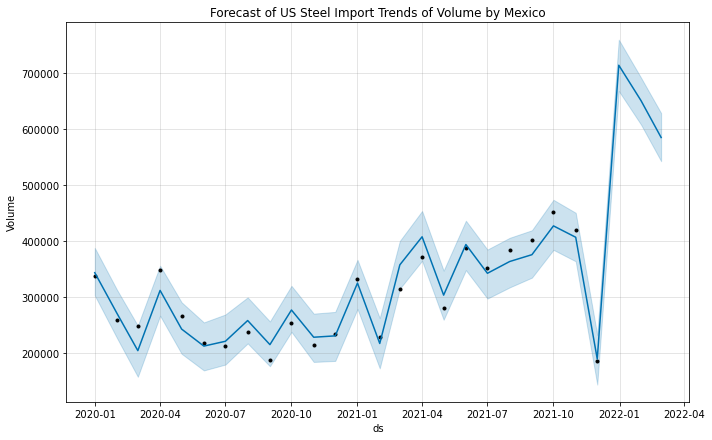

In [39]:
model.plot(forecast2022, uncertainty=True);
plt.ylabel('Volume')
plt.title('Forecast of US Steel Import Trends of Volume by Mexico')

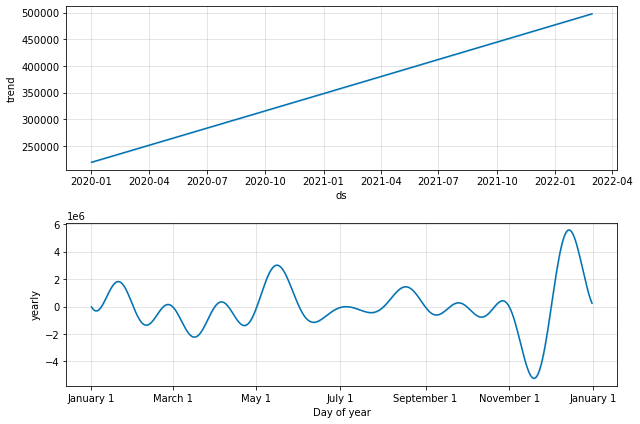

In [40]:
model.plot_components(forecast2022);

#### Korea

In [41]:
fb = pd.DataFrame()
fb['y'] = volume.loc['Korea']
fb.reset_index(inplace=True)
fb.rename(columns={'Date': 'ds'}, inplace=True)

In [42]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)
model.fit(fb)

future_dates = model.make_future_dataframe(periods=3, freq='M')
forecast2022 = model.predict(future_dates)
forecast2022.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,141823.187229,147220.597345,204737.222227,141823.187229,141823.187229,32880.903680,32880.903680,32880.903680,32880.903680,32880.903680,32880.903680,0.0,0.0,0.0,174704.090909
1,2020-02-01,147310.777864,125589.353520,182524.505902,147310.777864,147310.777864,7646.606159,7646.606159,7646.606159,7646.606159,7646.606159,7646.606159,0.0,0.0,0.0,154957.384023
2,2020-03-01,152444.330393,130492.134015,189722.828057,152444.330393,152444.330393,5921.204823,5921.204823,5921.204823,5921.204823,5921.204823,5921.204823,0.0,0.0,0.0,158365.535216
3,2020-04-01,157931.921030,102084.999348,162035.202561,157931.921030,157931.921030,-26169.995229,-26169.995229,-26169.995229,-26169.995229,-26169.995229,-26169.995229,0.0,0.0,0.0,131761.925801
4,2020-05-01,163242.492614,175922.700585,234428.252430,163242.492614,163242.492614,42815.512551,42815.512551,42815.512551,42815.512551,42815.512551,42815.512551,0.0,0.0,0.0,206058.005165


Text(0.5, 1.0, 'Forecast of US Steel Import Trends of Volume by Korea')

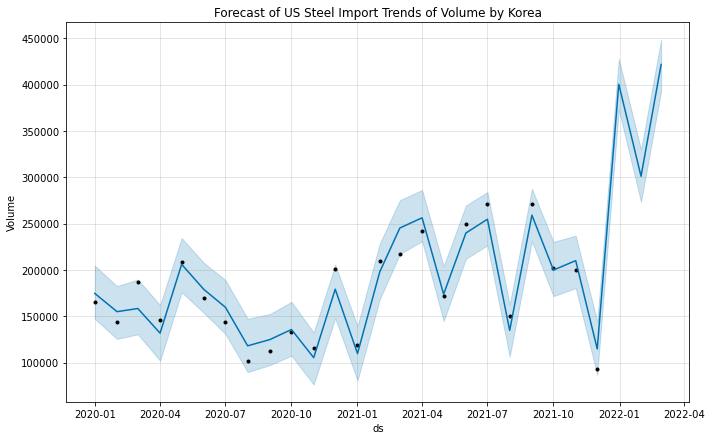

In [43]:
model.plot(forecast2022, uncertainty=True);
plt.ylabel('Volume')
plt.title('Forecast of US Steel Import Trends of Volume by Korea')

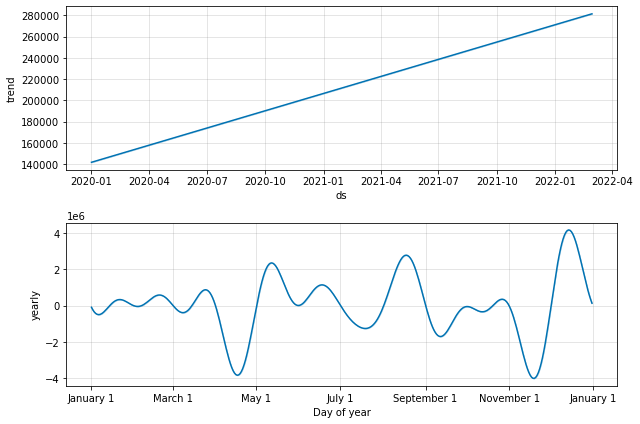

In [44]:
model.plot_components(forecast2022);